# ohsome quality analyst (OQT) 

OQT provides quality estimations of OpenStreetMap (OSM) data.
OQT calls those estimations Indicators.
Indicators are computed for a specific area (`bpolys`) and a certain set of aggregated OSM features (`layer`).

Two intrinsic quality estimation OQT offers are the Mapping Saturation indicator and the Currentness indicator.

## API Request Examples using Python

Below Python is used to make requests to the OQT API.

### Mapping Saturation Indicator

The Mapping Saturation indicator calculate the saturation of mapping activity within the last 3 years.
It is based on the premise that each aggregation of features (e.g. length of roads or count of buildings) has a maximum. After increased mapping activity saturation is reached near this maximum.
The Mapping Saturation indicator works well with following layers:

- Building Count (`building_count`)
- Major Roads Length (`major_roads_length`)
- Amenities (`amenities`)
- Point-of-Interests (`poi`)

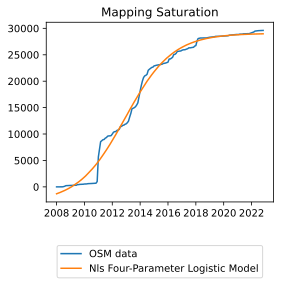

In [9]:
import json

import requests
from IPython.display import SVG, display


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

# OQT size restriction on the input geometry is 100 sqkm
with open("germany-heidelberg.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "name": "MappingSaturation",
    "layerKey": "building_count",
    "bpolys": bpolys,
    "includeSvg": True,
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

# print(json.dumps(result, indent=4))
display(SVG(svg))

### Curretness Indicator

The Currentness indicator works well with following layers:

- Building Count (`building_count`)
- Major Roads Count (`major_roads_count`)
- Amenities (`amenities`)

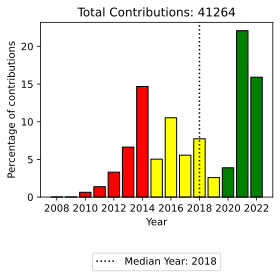

In [7]:
import json

import requests
from IPython.display import SVG, display


base_url = "https://oqt.ohsome.org/api"
endpoint = "/indicator"
url = base_url + endpoint

with open("germany-heidelberg.geojson", "r") as file:
    bpolys = json.load(file)

parameters = {
    "name": "Currentness",
    "layerKey": "building_count",
    "bpolys": bpolys,
    "includeSvg": True,
}

response = requests.post(url, json=parameters)
response.raise_for_status()  # Raise an Exception if HTTP Status Code is not 200

properties = response.json()["properties"]
result = properties["result"]
svg = result.pop("svg")

# print(json.dumps(result, indent=4))  # Pretty print response
display(SVG(svg))